In [115]:
#Exploratory Data Analysis : Haberman's Survival
#Relevant Information
#The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#It contains :-

#305 datapoints/rows
#4 fearures includeing class label
#Attributes/Features Information
#There are 4 features including class label/dependent variable. 
#30 - It represents age of patient at the time of operation(numerical) 
#64 - It represents year of operation(numerical) 
#1 - It tells no of +ve auxillry node detected(numerical) 
#1.1 - Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

#Objective
#To classify/predict a patient survival who had undergone surgery for breast cancer.


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [116]:
# To rename the column name for better understanding
# Both of the ways we can rename the columns name

#df.columns = ["age", "operation_year", "axillary_lymph_node", "survival_status"]

#or

df = df.rename(columns = {"30" : "age", "64" : "operation_year", "1" : "axillary_lymph_node", "1.1" : "survival_status_after_5_years"})

#Observations:
#There are no missing values in this dataset. So there is no need to do data imputation.
#The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.
#The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)


In [117]:
df.shape
df.head()

,age,operation_year,axillary_lymph_node,survival_status_after_5_years
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [118]:
df['survival_status_after_5_years'].value_counts()

1    224
2     81
Name: survival_status_after_5_years, dtype: int64

In [119]:
df.shape

(305, 4)

In [120]:
df.describe()

,age,operation_year,axillary_lymph_node,survival_status_after_5_years
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [121]:
# modify the target column values to be meaningful as well as categorical
df['survival_status_after_5_years'] = df['survival_status_after_5_years'].map({1:"yes", 2:"no"})
df['survival_status_after_5_years'] = df['survival_status_after_5_years'].astype('category')
df

,age,operation_year,axillary_lymph_node,survival_status_after_5_years
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes
5,33,60,0,yes
6,34,59,0,no
7,34,66,9,no
8,34,58,30,yes
9,34,60,1,yes


In [122]:
#Univariate Analysis(pdf, cdf, boxplot and violin plot)
#Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so,
#in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) 
#and it's major purpose is to describe;
#it takes data, summarizes that data and finds patterns in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age                              305 non-null int64
operation_year                   305 non-null int64
axillary_lymph_node              305 non-null int64
survival_status_after_5_years    305 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


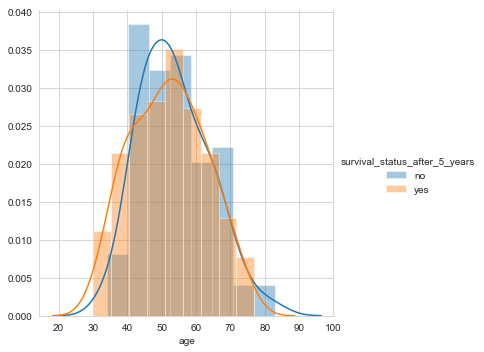

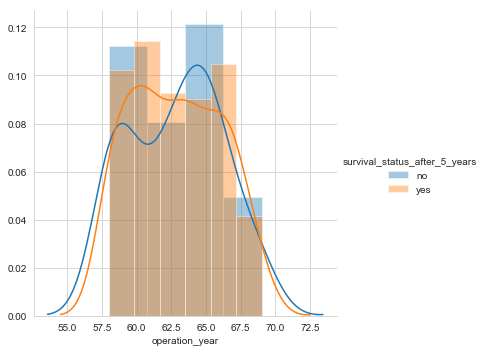

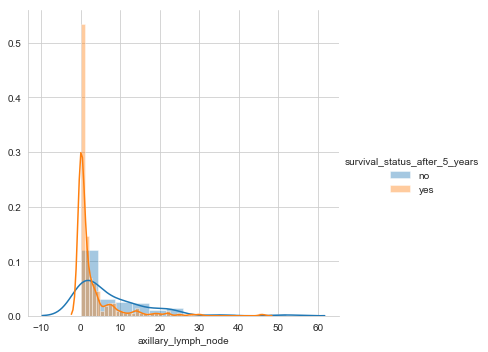

In [146]:
# Here, we are using age feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interval
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status_after_5_years', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()
    


********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]
********* operation_year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]
********* axillary_lymph_node *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.

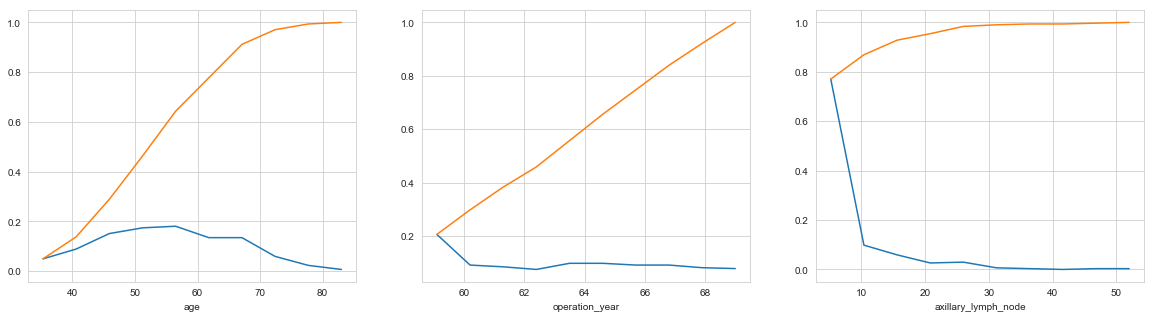

In [148]:
#5.2 CDF
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

In [18]:
#observations

#In all the plots the features are overlapping each other massively. But somehow we can say
#probabily 58% people survived who had 0-5 axlillary_lymph_node and 12% died as well.

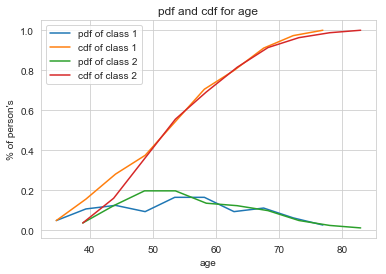

In [126]:
# one = df.loc[df["survival_status"] == 1]
# two = df.loc[df["survival_status"] == 2]
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means survived
# Class 2 means not survived
one = df.loc[df["survival_status_after_5_years"] == 'yes']
two = df.loc[df["survival_status_after_5_years"] == 'no']
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

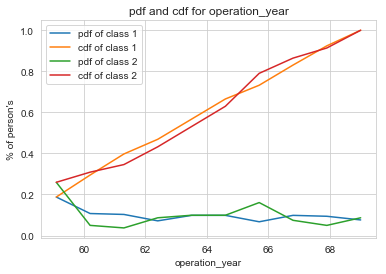

In [127]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(two["operation_year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for operation_year")
plt.xlabel("operation_year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show();

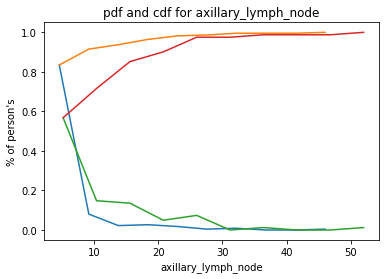

In [21]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
counts, bin_edges = np.histogram(one["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["axillary_lymph_node"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for axillary_lymph_node")
plt.xlabel("axillary_lymph_node")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

In [128]:
#Observations

#15% of the person's have less than or equal to age 37 who survived.
#perosons' who has more than 46 auxillary_lymph_node not survived.

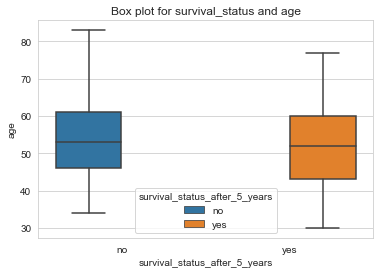

In [130]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median
# We can add title in box plot using either way
# plt.title("Box plot for survival_status and age") or set_title("")

sns.boxplot(x = "survival_status_after_5_years", y = "age", hue = "survival_status_after_5_years", data = df).set_title("Box plot for survival_status and age")
plt.show()

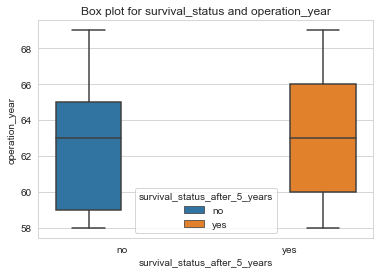

In [131]:
sns.boxplot(x = "survival_status_after_5_years", y = "operation_year", hue = "survival_status_after_5_years", data = df).set_title("Box plot for survival_status and operation_year")
plt.show()

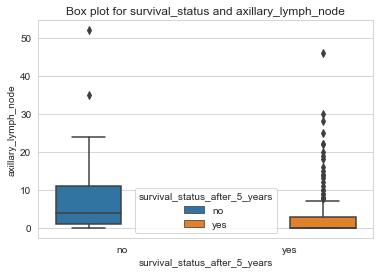

In [132]:
sns.boxplot(x = "survival_status_after_5_years", y = "axillary_lymph_node", hue = "survival_status_after_5_years", data = df).set_title("Box plot for survival_status and axillary_lymph_node")
plt.show()

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


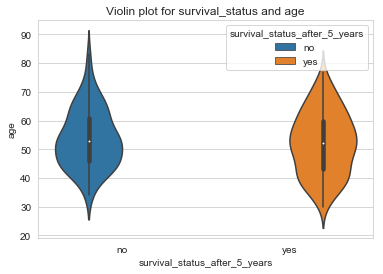

In [134]:
 #The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x = "survival_status_after_5_years", y = "age", hue = "survival_status_after_5_years", data = df)
plt.title("Violin plot for survival_status and age")
plt.show()

In [29]:
#Bivariate Analysis
#Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. 
#It involves the analysis of two variables (often denoted as X, Y), 
#for the purpose of determining the empirical relationship between them

#Scatter Plot
#A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) 
#and is usually drawn before working out a linear correlation or fitting a regression line. 
#The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

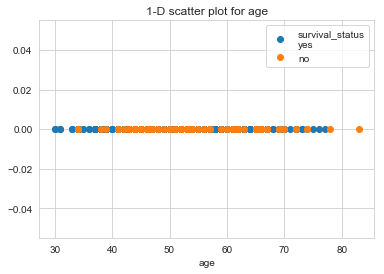

In [140]:
# 1-d scatter plot

one = df.loc[df["survival_status_after_5_years"] == 'yes']
two = df.loc[df["survival_status_after_5_years"] == 'no']
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label = "survival_status\n" "yes")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "no")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()

In [31]:
#observations

#After looking at this plot we can easily count number of points that are there in age range who survived or not.
#Many person died whose age was between 41-70.

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


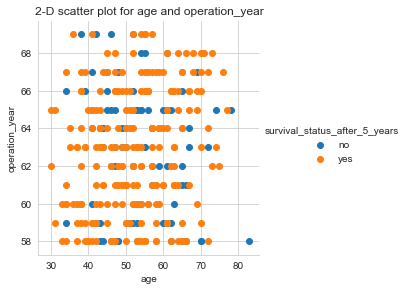

In [141]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status_after_5_years", size = 4).map(plt.scatter, "age", "operation_year").add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


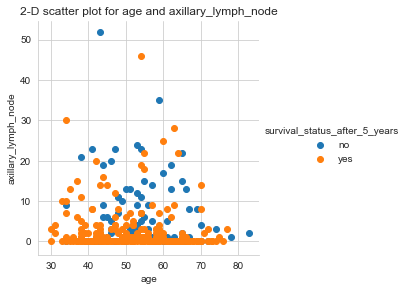

In [142]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status_after_5_years", size = 4).map(plt.scatter, "age", "axillary_lymph_node").add_legend()
plt.title("2-D scatter plot for age and axillary_lymph_node")
plt.show()

In [34]:
#observations

#In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
#0-5 axillary_lymph_node person survived and died as well but the died ratio is less than survive ratio.

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


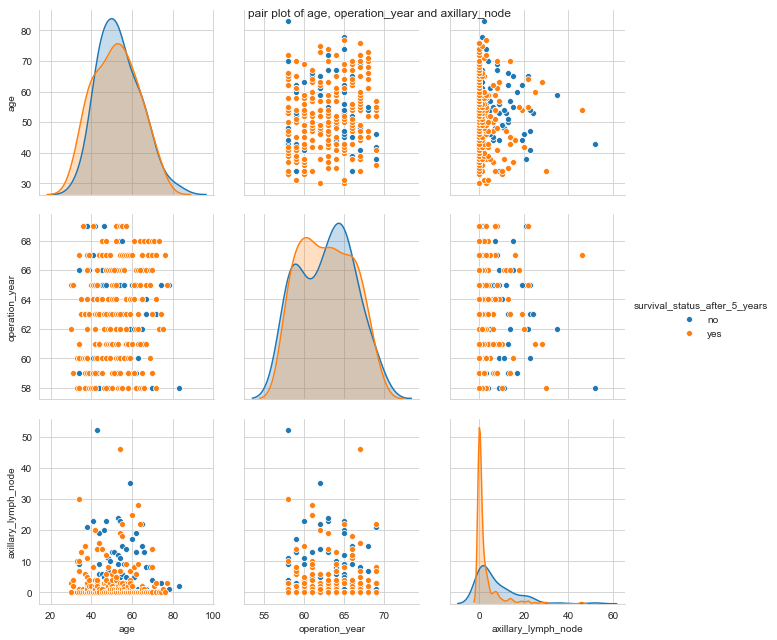

In [143]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.

sns.set_style("whitegrid")
sns.pairplot(df, hue = "survival_status_after_5_years", vars = ["age", "operation_year", "axillary_lymph_node"], size = 3)
plt.suptitle("pair plot of age, operation_year and axillary_node")
plt.show()

In [36]:
#Observation

#As we are unable to classify which is the most useful feature because of too much overlapping.
#But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.
#And hence, this plot is not much informative in this case.

#Conclusion

#The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
#The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and 
#hence it is very diffucult to classify.
#somehow axillary_lymph_node is giving some intution in the dataset.
#we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.